In [42]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [89]:
with open("/Users/vladimirduzev/PycharmProjects/DSIS/Cyber_security.csv", encoding='utf-8') as r_file:
    file = csv.reader(r_file, delimiter = ",")
    count = 0
    for row in file:
        if count ==0:
            print(f'Файл содержит столбцы: {", ".join(row)}')
        else:
            print(f'{row[1]} - {row[0]}; CEI: {row[2]}; GCI: {row[3]}; NSCI: {row[4]}; DDL: {row[5]}')
        count += 1
    print(f'всего {count} строк')

Файл содержит столбцы: Country, Region, CEI, GCI, NCSI, DDL
Asia-Pasific - Afghanistan; CEI: 1.0; GCI: 5.2; NSCI: 11.69; DDL: 19.5
Europe - Albania; CEI: 0.566; GCI: 64.32; NSCI: 62.34; DDL: 48.74
Africa - Algeria; CEI: 0.721; GCI: 33.95; NSCI: 33.77; DDL: 42.81
Europe - Andorra; CEI: ; GCI: 26.38; NSCI: ; DDL: 
Africa - Angola; CEI: ; GCI: 12.99; NSCI: 9.09; DDL: 22.69
North America - Antigua and Barbuda; CEI: ; GCI: 15.62; NSCI: 11.69; DDL: 57.1
South America - Argentina; CEI: 0.514; GCI: 50.12; NSCI: 63.64; DDL: 60.43
Europe - Armenia; CEI: 0.655; GCI: 50.47; NSCI: 35.06; DDL: 55.06
Asia-Pasific - Australia; CEI: 0.131; GCI: 97.47; NSCI: 66.23; DDL: 77.61
Europe - Austria; CEI: 0.162; GCI: 93.89; NSCI: 68.83; DDL: 75.76
Europe - Azerbaijan; CEI: 0.531; GCI: 89.31; NSCI: 59.74; DDL: 54.78
North America - Bahamas; CEI: ; GCI: 13.37; NSCI: 20.78; DDL: 65.1
Asia-Pasific - Bahrain; CEI: ; GCI: 77.86; NSCI: 25.97; DDL: 65.17
Asia-Pasific - Bangladesh; CEI: 0.759; GCI: 81.27; NSCI: 67.53; 

Region
Africa           0.529868
Asia-Pasific     0.510744
Europe           0.349438
North America    0.468205
South America    0.536611
Name: CEI, dtype: float64


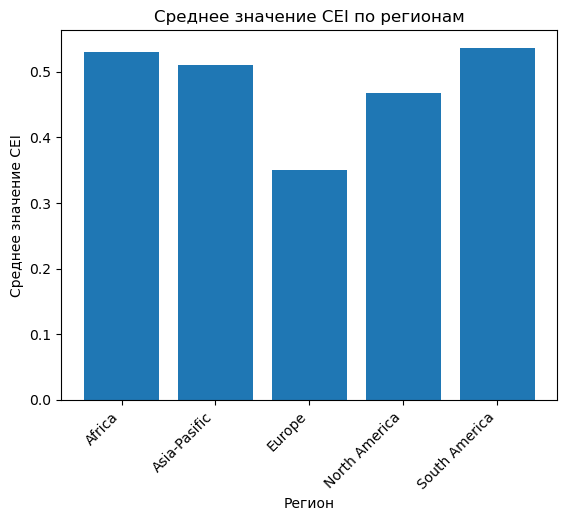

In [55]:
X = []
Y = []
df = pd.read_csv('/Users/vladimirduzev/PycharmProjects/DSIS/Cyber_security.csv')

mean_cei = df['CEI'].mean()                 #Вычисляется среднее по столбцу
df['CEI'].fillna(mean_cei, inplace=True)    #Заменяются Nan-ячейки на ср.знач по столбцу
result = df.groupby('Region')['CEI'].mean() #Сортируем по региону и высчитываем среднее
print(result)
plt.bar(result.index, result.values)
plt.xlabel('Регион')
plt.ylabel('Среднее значение CEI')
plt.title('Среднее значение CEI по регионам')
plt.xticks(rotation=45, ha='right')  
plt.show()

Region
Africa           35.899434
Asia-Pasific     53.699992
Europe           80.548115
North America    32.776667
South America    51.720909
Name: GCI, dtype: float64


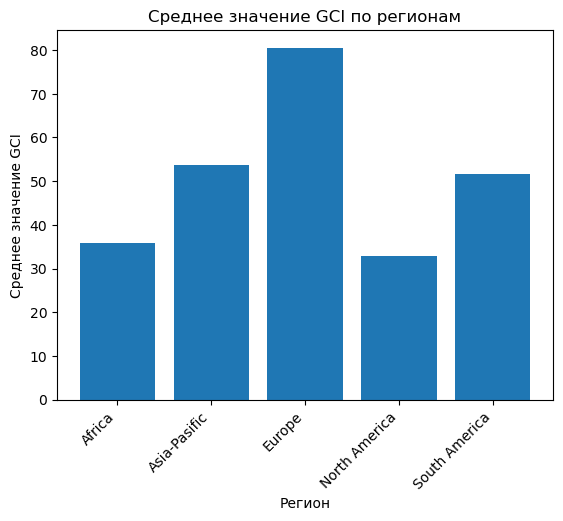

In [56]:
mean_cei = df['GCI'].mean()
df['GCI'].fillna(mean_cei, inplace=True)
result = df.groupby('Region')['GCI'].mean()
print(result)
plt.bar(result.index, result.values)
plt.xlabel('Регион')
plt.ylabel('Среднее значение GCI')
plt.title('Среднее значение GCI по регионам')
plt.xticks(rotation=45, ha='right')  
plt.show()

Region
Africa           31.761676
Asia-Pasific     37.571951
Europe           68.536596
North America    29.438333
South America    48.290000
Name: NCSI, dtype: float64


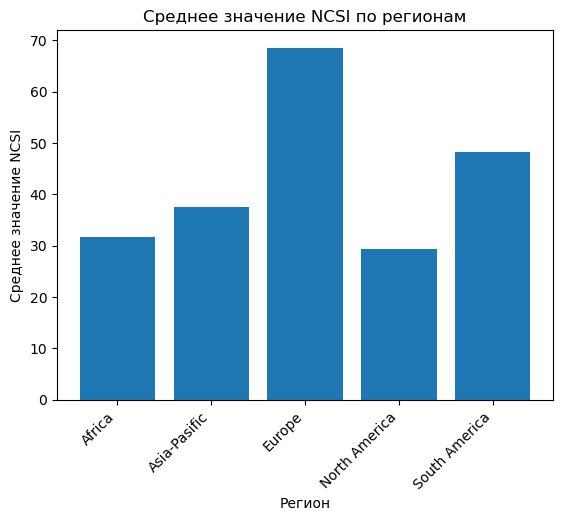

In [57]:
mean_cei = df['NCSI'].mean()
df['NCSI'].fillna(mean_cei, inplace=True)
result = df.groupby('Region')['NCSI'].mean()
print(result)
plt.bar(result.index, result.values)
plt.xlabel('Регион')
plt.ylabel('Среднее значение NCSI')
plt.title('Среднее значение NCSI по регионам')
plt.xticks(rotation=45, ha='right')  
plt.show()

Region
Africa           40.198008
Asia-Pasific     50.254993
Europe           66.639149
North America    50.610417
South America    51.800000
Name: DDL, dtype: float64


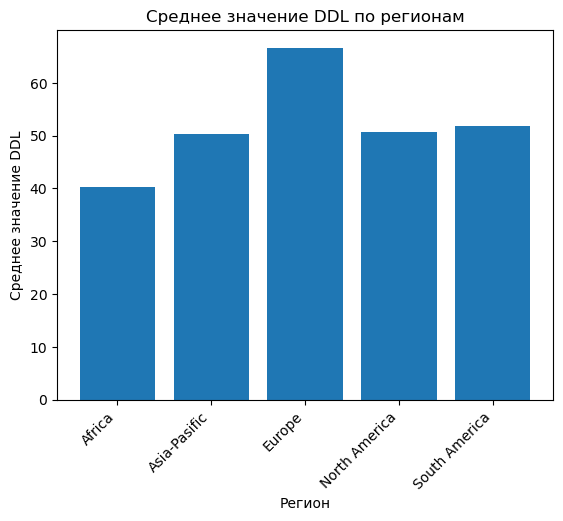

In [58]:
mean_cei = df['DDL'].mean()
df['DDL'].fillna(mean_cei, inplace=True)
result = df.groupby('Region')['DDL'].mean()
print(result)
plt.bar(result.index, result.values)
plt.xlabel('Регион')
plt.ylabel('Среднее значение DDL')
plt.title('Среднее значение DDL по регионам')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [90]:
import plotly.express as px
import plotly
import plotly.graph_objs as go

In [91]:
default_cei = -1
df['CEI'].fillna(default_cei, inplace=True)
fig = px.scatter_geo(df, locations="Country", locationmode="country names", color="CEI",
                     hover_name="Country", projection="natural earth",
                     title="Значение CEI по странам") #создание интерактивной географической диаграммы рассеяния 
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,          # Отображение океана
    oceancolor="lightblue",  # Цвет океана
)

# Добавление элементов управления картой
fig.update_geos(
    lonaxis_range=[-180, 180],  # Диапазон долготы
    lataxis_range=[-90, 90],    # Диапазон широты
    showrivers=True,            # Отображение рек
    rivercolor="blue",          
    showcountries=True,         # Отображение границ стран
    countrycolor="gray"         
)

fig.update_layout(
    width=1000,  # Ширина в пикселях
    height=800  # Высота в пикселях
)

fig.show()

In [93]:
default_DDL = -1
df['DDL'].fillna(default_DDL, inplace=True)
fig = px.scatter_geo(df, locations="Country", locationmode="country names", color="DDL",
                     hover_name="Country", projection="natural earth",
                     title="Значение DDL по странам")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    showocean=True,  # Отображение океана
    oceancolor="lightblue",  # Цвет океана
)

# Добавление элементов управления картой
fig.update_geos(
    lonaxis_range=[-180, 180],  # Диапазон долготы
    lataxis_range=[-90, 90],    # Диапазон широты
    showcountries=True,         # Отображение границ стран
    countrycolor="gray"         # Цвет границ стран
)

fig.update_layout(
    width=1000,  # Ширина в пикселях
    height=800  # Высота в пикселях
)

fig.show()